In [1]:
# import required libraries
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import seaborn as sns

In [2]:
# read in the dataset
df = pd.read_csv("./Resources/Project_Management_Data.csv")

# show the first few rows of the data
df.head()

,DepartmentOrOffice,ProjectOrRequestType,ProjectTitle,ProjectComponents,ProjectDetails_AssignedTo,Date and Time
0,Executive,Other,Strategic Alliance Book,"Writing, Editing",Erin Babbo,10/24/2019 11:44:00 PM
1,Council,Video,Budget Video Script,Writing,Erin Babbo,10/24/2019 11:41:00 PM
2,Human Services,Other,Budget blog,"Community Engagement, Editing",Kari Moore,10/24/2019 11:31:00 PM
3,Council,Video,Email Correspondence to schedule Connie Videos,Writing,Erin Babbo,10/24/2019 09:51:00 PM
4,Council,Media Relations,Council Budget Schedule News Release,"Writing, Website, Media Relations",Erin Babbo,10/24/2019 09:35:00 PM


In [3]:
# check the data types of the columns
df.dtypes

DepartmentOrOffice           object
ProjectOrRequestType         object
ProjectTitle                 object
ProjectComponents            object
ProjectDetails_AssignedTo    object
Date and Time                object
dtype: object

In [4]:
# check for missing values
df.isnull().sum()

DepartmentOrOffice             1
ProjectOrRequestType          93
ProjectTitle                   2
ProjectComponents            122
ProjectDetails_AssignedTo      6
Date and Time                 22
dtype: int64

In [5]:
# drop the missinig values
df = df.dropna()

In [6]:
# check for missing values
df.isnull().sum()

DepartmentOrOffice           0
ProjectOrRequestType         0
ProjectTitle                 0
ProjectComponents            0
ProjectDetails_AssignedTo    0
Date and Time                0
dtype: int64

In [7]:
# count the number of projects assigned to each person
df['ProjectDetails_AssignedTo'].value_counts()

Lillian Allred                      807
Kari Moore                          425
Erin Babbo                          239
Amanda Hansen                       164
Libby Catalinich                     84
Emmi Buck                            69
Kyle Schmidtke                       55
Amanda Robinett                      41
John Deweese                         41
Amanda Robinett, Amanda Hansen       13
Lillian Allred, Libby Catalinich      4
Lillian Allred, Kyle Schmidtke        1
Kyle Schmidtke, Lillian Allred        1
Lillian Allred, Amanda Hansen         1
John Deweese, Kyle Schmidtke          1
Name: ProjectDetails_AssignedTo, dtype: int64

In [8]:
# count the number of projects in each department
projects_by_department = df['DepartmentOrOffice'].value_counts()
projects_by_department

Human Services                        452
Council                               229
Human Resources                       204
Auditor                               188
Planning and Public Works             185
Parks and Recreation                  124
Executive                             113
Finance                                81
External                               54
Communications                         53
Facilities Management                  53
Economic Development                   35
Emergency Management                   34
Finance-Risk Management                30
District Court                         20
Superior Court                         15
Prosecuting Attorney                   12
Family Justice Center                  11
Juvenile Court                          6
Sheriff                                 6
Finance-IT                              5
Assessor / Treasurer                    5
Law Library                             4
Clerk of the Superior Court       

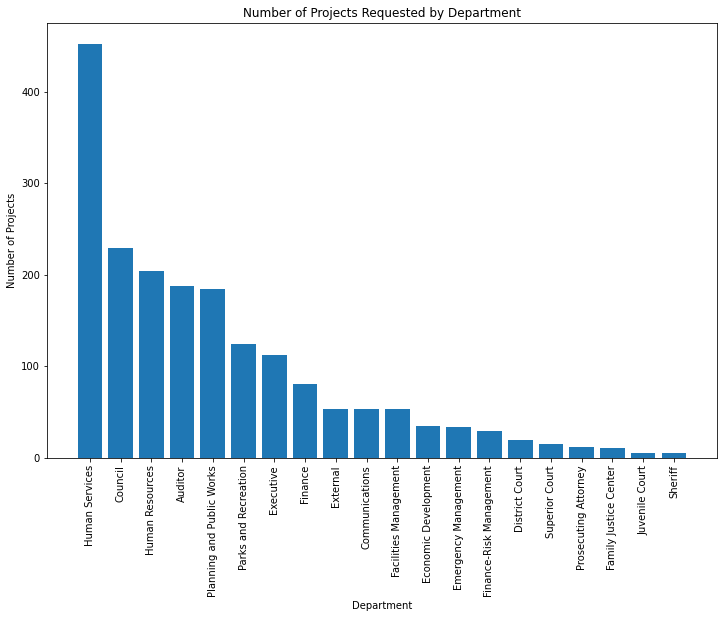

In [9]:
# create a bar chart of the number of projects by department
projects_by_department_top20 = projects_by_department[:20]
plt.figure(figsize=(12,8))
plt.bar(projects_by_department_top20.index, projects_by_department_top20.values)
plt.title('Number of Projects Requested by Department')
plt.xlabel('Department')
plt.ylabel('Number of Projects')
plt.xticks(rotation=90)

# Save the plot as a PNG file
plt.savefig("./Images/ProjectsRequestedByDepartment.png")

plt.show()

In [10]:
# Identify the most productive department in terms of the number of projects completed
prod_dept = df.groupby(['DepartmentOrOffice']).size().idxmax()
prod_dept

'Human Services'

In [11]:
# count the number of projects in each project type
project_type = df['ProjectOrRequestType'].value_counts()
project_type

Employee Communications                                   479
News Releases                                             262
Website                                                   205
Graphic Design/Marketing (Posters, Brochures, Reports)    188
Other                                                     132
                                                         ... 
Website, Forms                                              1
News Releases, Website                                      1
Video, Social Media                                         1
Event/Open Houses, Social Media                             1
Social Media, Video, Website                                1
Name: ProjectOrRequestType, Length: 154, dtype: int64

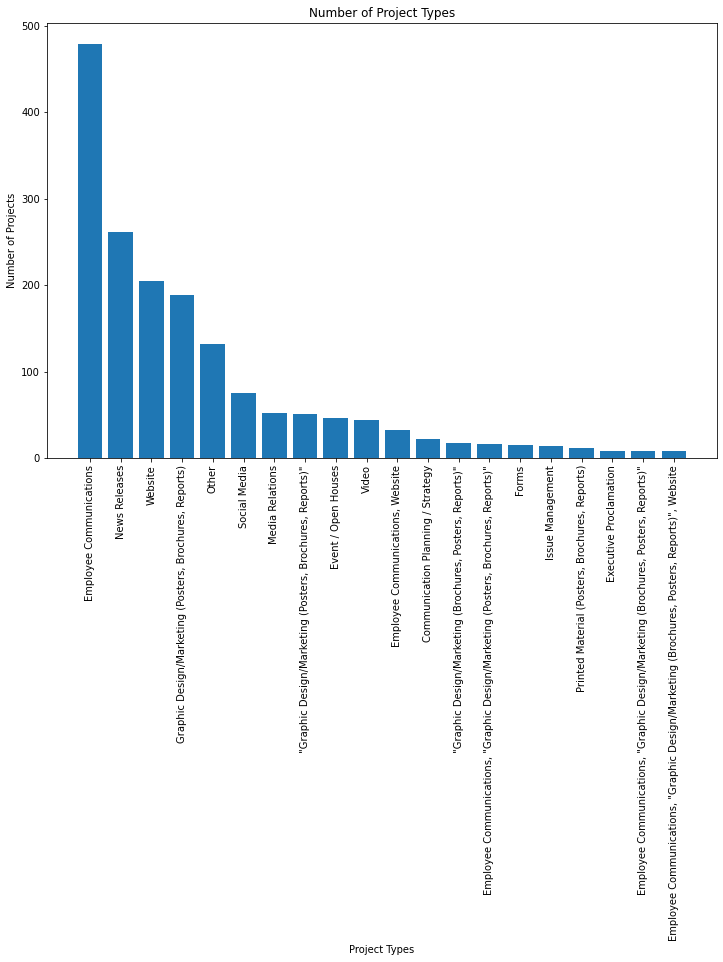

In [12]:
# create a bar chart of the number of projects by department
project_type_top20 = project_type[:20]
plt.figure(figsize=(12,8))
plt.bar(project_type_top20.index, project_type_top20.values)
plt.title('Number of Project Types')
plt.xlabel('Project Types')
plt.ylabel('Number of Projects')
plt.xticks(rotation=90)

# Save the plot as a PNG file
plt.savefig("./Images/ProjectTypes.png")

plt.show()

In [13]:
# Identify the most common project type
common_project = df.groupby(['ProjectOrRequestType']).size().idxmax()
print(common_project)

Employee Communications


In [14]:
# Find out the average number of project components for each project type

avg_components = df.groupby(['ProjectOrRequestType'])['ProjectComponents'].apply(lambda x: x.str.count(',')+1).mean()
print(avg_components)

2.276978417266187


In [15]:
# extract the month and year from the 'Date and Time' column to see the number of projects per month and year
df['Date and Time'] = pd.to_datetime(df['Date and Time'])
df['Month'] = df['Date and Time'].dt.month
df['Year'] = df['Date and Time'].dt.year

projects_per_month = df.groupby(['Year', 'Month']).size().reset_index(name='NumProjects')
projects_per_month

,Year,Month,NumProjects
0,2017,11,1
1,2017,12,3
2,2018,1,44
3,2018,2,17
4,2018,3,33
5,2018,4,26
6,2018,5,34
7,2018,6,31
8,2018,7,9
9,2018,8,25


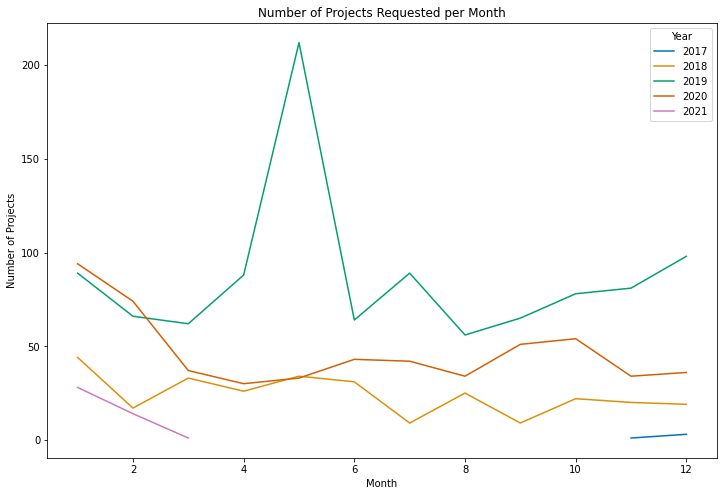

In [16]:
plt.figure(figsize=(12,8))
sns.lineplot(x='Month', y='NumProjects', hue='Year', palette='colorblind', data=projects_per_month)
plt.title('Number of Projects Requested per Month')
plt.xlabel('Month')
plt.ylabel('Number of Projects')

# Save the plot as a PNG file
plt.savefig("./Images/ProjectsRequestedPerMonthLine.png")

plt.show()

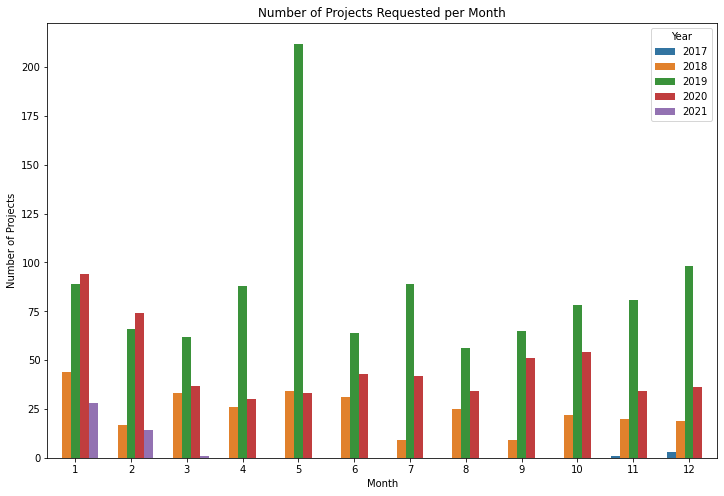

In [17]:
plt.figure(figsize=(12,8))
sns.barplot(x='Month', y='NumProjects', hue='Year', data=projects_per_month)
plt.title('Number of Projects Requested per Month')
plt.xlabel('Month')
plt.ylabel('Number of Projects')

# Save the plot as a PNG file
plt.savefig("./Images/ProjectsRequestedPerMonthGroupedBar.png")

plt.show()

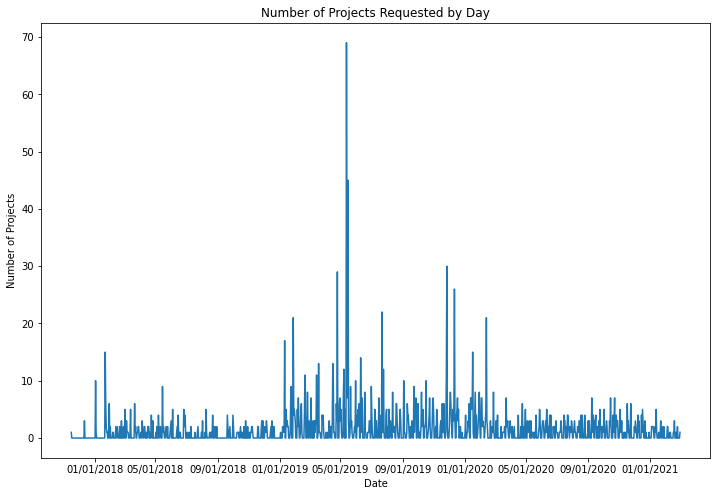

In [18]:
# Group by date and count the number of projects
projects_by_date = df.groupby(pd.Grouper(key='Date and Time', freq='D')).size()


# Create a line plot of the number of projects over time
fig, ax = plt.subplots(figsize=(12,8))
ax.plot(projects_by_date.index, projects_by_date.values)
ax.set_title('Number of Projects Requested by Day')
ax.set_xlabel('Date')
ax.set_ylabel('Number of Projects')
ax.xaxis.set_major_formatter(mdates.DateFormatter('%m/%d/%Y'))

# Save the plot as a PNG file
plt.savefig("./Images/ProjectsRequestedByDay.png")

plt.show()

In [19]:
# Compare the number of projects assigned to each person in each department

person_counts = df.groupby(['DepartmentOrOffice', 'ProjectDetails_AssignedTo']).size().unstack(fill_value=0)
person_counts

ProjectDetails_AssignedTo,Amanda Hansen,Amanda Robinett,"Amanda Robinett, Amanda Hansen",Emmi Buck,Erin Babbo,John Deweese,"John Deweese, Kyle Schmidtke",Kari Moore,Kyle Schmidtke,"Kyle Schmidtke, Lillian Allred",Libby Catalinich,Lillian Allred,"Lillian Allred, Amanda Hansen","Lillian Allred, Kyle Schmidtke","Lillian Allred, Libby Catalinich"
DepartmentOrOffice,,,,,,,,,,,,,,,
Assessor / Treasurer,0,0,0,0,0,0,0,0,0,0,0,5,0,0,0
Assessor-Treasurer,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
Assigned Counsel (Public Defender),2,0,0,0,0,0,0,0,1,0,0,0,0,0,0
Auditor,115,30,10,0,1,0,0,0,1,0,1,28,0,0,2
COunil,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0
Clerk of the Superior Court,0,0,0,0,0,0,0,0,0,0,0,4,0,0,0
Communications,16,1,0,0,4,2,0,0,4,1,5,20,0,0,0
Communications-PPW,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
Council,2,3,0,1,213,0,0,0,0,0,0,10,0,0,0


In [20]:
# Analyze the relationship between project type and assigned person

project_person = df.groupby(['ProjectOrRequestType', 'ProjectDetails_AssignedTo']).size().unstack(fill_value=0)
project_person

ProjectDetails_AssignedTo,Amanda Hansen,Amanda Robinett,"Amanda Robinett, Amanda Hansen",Emmi Buck,Erin Babbo,John Deweese,"John Deweese, Kyle Schmidtke",Kari Moore,Kyle Schmidtke,"Kyle Schmidtke, Lillian Allred",Libby Catalinich,Lillian Allred,"Lillian Allred, Amanda Hansen","Lillian Allred, Kyle Schmidtke","Lillian Allred, Libby Catalinich"
ProjectOrRequestType,,,,,,,,,,,,,,,
"""Graphic Design/Marketing (Brochures, Posters, Reports)""",0,0,0,3,0,0,0,11,0,0,0,3,0,0,0
"""Graphic Design/Marketing (Brochures, Posters, Reports)"", Communication Planning/Strategy",0,0,0,2,0,0,0,4,0,0,0,0,0,0,0
"""Graphic Design/Marketing (Brochures, Posters, Reports)"", Communication Planning/Strategy, Social Media",0,0,0,0,0,0,0,2,0,0,0,0,0,0,0
"""Graphic Design/Marketing (Brochures, Posters, Reports)"", Communication Planning/Strategy, Social Media, Video",0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
"""Graphic Design/Marketing (Brochures, Posters, Reports)"", Communication Planning/Strategy, Social Media, Website, Media Relations",0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
"Website, Social Media, Communication Planning / Strategy",0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
"Website, Social Media, Communication Planning/Strategy",0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
"Website, Social Media, News Releases",0,0,0,0,0,0,0,1,0,0,0,0,0,0,0


In [21]:
# Calculate the percentage of projects that require website development
website_projects = df['ProjectComponents'].str.contains('Website').sum()
total_projects = df.shape[0]
pct_website = website_projects / total_projects * 100

print(pct_website)

45.94039054470709


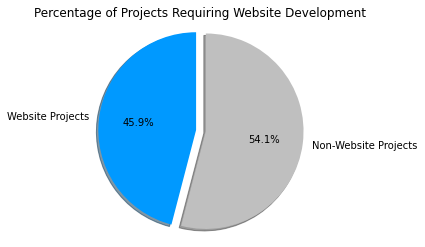

In [22]:
# create a pie chart for the percentage of projects that require website development

non_website_projects = df.shape[0] - website_projects

# Plot
labels = ['Website Projects', 'Non-Website Projects']
sizes = [website_projects, non_website_projects]
colors = ['#0099ff', '#bfbfbf']
explode = (0.1, 0)

fig, ax = plt.subplots()
ax.pie(sizes, explode=explode, labels=labels, colors=colors,
       autopct='%1.1f%%', shadow=True, startangle=90)
ax.axis('equal')

plt.title('Percentage of Projects Requiring Website Development')

# Save the plot as a PNG file
plt.savefig("./Images/WebsiteDevelopment.png")

plt.show()

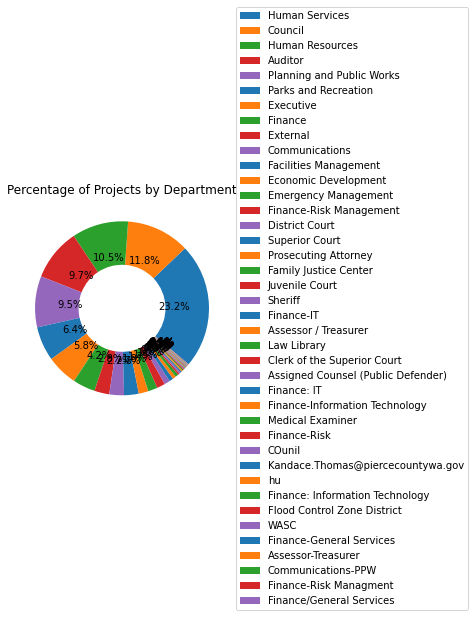

In [23]:
# Calculate the percentage of projects for each department
dept_counts = df['DepartmentOrOffice'].value_counts()
dept_pcts = dept_counts / dept_counts.sum() * 100

# Define the colors for each department
colors = ['tab:blue', 'tab:orange', 'tab:green', 'tab:red', 'tab:purple']

# Create a figure and axes objects
fig, ax = plt.subplots()

# Plot the donut chart
wedges, texts, autotexts = ax.pie(dept_pcts, wedgeprops=dict(width=0.5), startangle=-40, colors=colors, autopct='%1.1f%%')

# Add a circle in the center to create the donut effect
circle = plt.Circle((0,0), 0.35, color='white')
ax.add_artist(circle)

# Add labels for each department
labels = dept_pcts.index.tolist()
ax.legend(wedges, labels, loc='center left', bbox_to_anchor=(1, 0.5))

# Set the title of the chart
ax.set_title('Percentage of Projects by Department')

# Save the plot as a PNG file
plt.savefig("./Images/ProjectsPercentageByDepartment.png")

# Show the chart
plt.show()

In [24]:
# Identify the most common project type requested by each department
dept_project_counts = df.groupby(['DepartmentOrOffice', 'ProjectOrRequestType']).size()
max_dept_project_counts = dept_project_counts.groupby(level=0).nlargest(1)
max_dept_project_counts

DepartmentOrOffice                  DepartmentOrOffice                  ProjectOrRequestType                                  
Assessor / Treasurer                Assessor / Treasurer                News Releases                                              3
Assessor-Treasurer                  Assessor-Treasurer                  Employee Communications                                    1
Assigned Counsel (Public Defender)  Assigned Counsel (Public Defender)  Social Media                                               2
Auditor                             Auditor                             Graphic Design/Marketing (Posters, Brochures, Reports)    59
COunil                              COunil                              Media Relations, Social Media                              2
Clerk of the Superior Court         Clerk of the Superior Court         Website                                                    2
Communications                      Communications                      Soc

In [25]:
# calculate the average number of project components for each project type
avg_comp_by_type = df.groupby('ProjectOrRequestType')['ProjectComponents'].apply(lambda x: x.str.split(',').str.len().mean())
avg_comp_by_type

ProjectOrRequestType
"Graphic Design/Marketing (Brochures, Posters, Reports)"                                                                             2.117647
"Graphic Design/Marketing (Brochures, Posters, Reports)", Communication Planning/Strategy                                            2.833333
"Graphic Design/Marketing (Brochures, Posters, Reports)", Communication Planning/Strategy, Social Media                              4.000000
"Graphic Design/Marketing (Brochures, Posters, Reports)", Communication Planning/Strategy, Social Media, Video                       5.000000
"Graphic Design/Marketing (Brochures, Posters, Reports)", Communication Planning/Strategy, Social Media, Website, Media Relations    5.000000
                                                                                                                                       ...   
Website, Social Media, Communication Planning / Strategy                                                                       

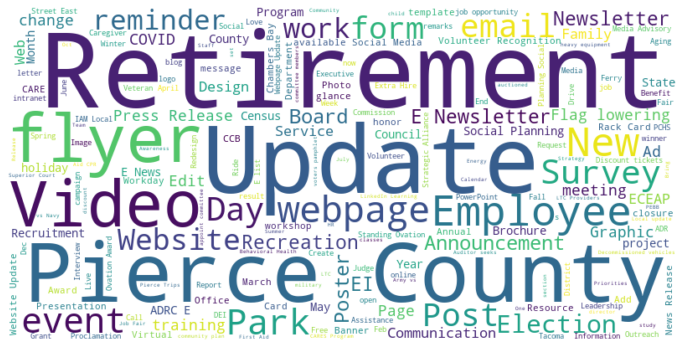

In [26]:
# create a word cloud of the project titles to visualize the most common words used

from wordcloud import WordCloud

text = ' '.join(df['ProjectTitle'].astype(str).tolist())
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)
plt.figure(figsize=(12, 8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')

# Save the plot as a PNG file
plt.savefig("./Images/WordCloud.png")

plt.show()